In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../Data/hearing_test.csv")

In [3]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [4]:
df.describe()

,age,physical_score,test_result
count,5000.000000,5000.000000,5000.000000
mean,51.609000,32.760260,0.600000
std,11.287001,8.169802,0.489947
min,18.000000,-0.000000,0.000000
25%,43.000000,26.700000,0.000000
50%,51.000000,35.300000,1.000000
75%,60.000000,38.900000,1.000000
max,90.000000,50.000000,1.000000


In [5]:
df.isna().sum()

age               0
physical_score    0
test_result       0
dtype: int64

In [6]:
df["test_result"].value_counts()

1    3000
0    2000
Name: test_result, dtype: int64

<AxesSubplot:xlabel='test_result', ylabel='count'>

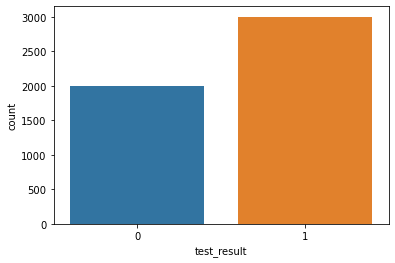

In [7]:
sns.countplot(x=df["test_result"])

<AxesSubplot:xlabel='physical_score', ylabel='test_result'>

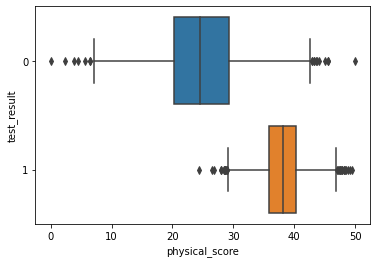

In [8]:
sns.boxplot(data=df, y="test_result",x="physical_score", orient="h")

<AxesSubplot:xlabel='age', ylabel='physical_score'>

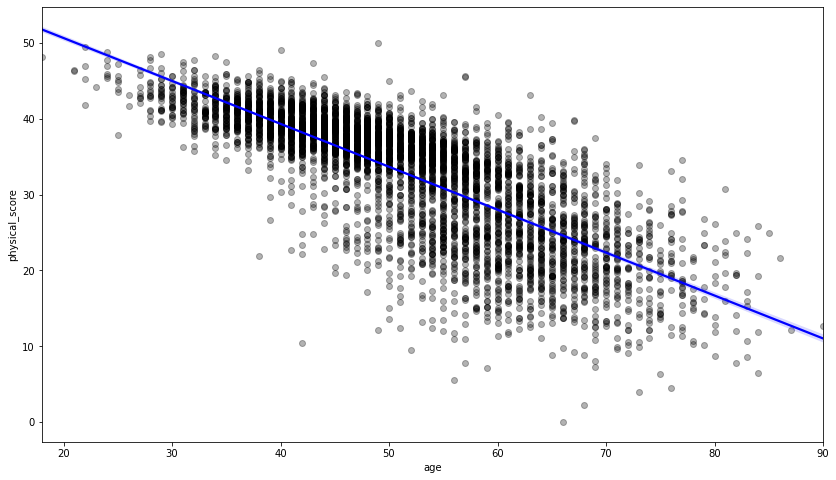

In [9]:
fig=plt.figure(figsize=(14,8))
sns.regplot(x="age",y="physical_score", data=df, scatter_kws={"alpha":0.3,"color": "black", }, line_kws={"color": "blue"})

<AxesSubplot:xlabel='age', ylabel='physical_score'>

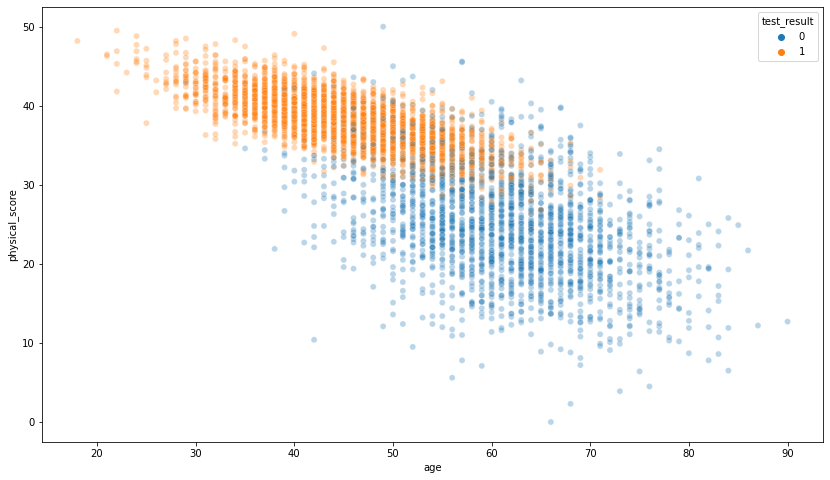

In [10]:
fig = plt.figure(figsize=(14,8))
sns.scatterplot(x="age",y="physical_score",hue="test_result", alpha=0.3,data=df)

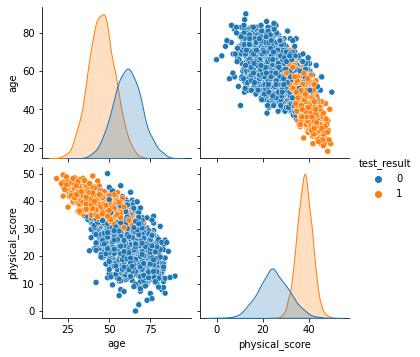

In [11]:
sns.pairplot(data=df, hue="test_result")

<AxesSubplot:>

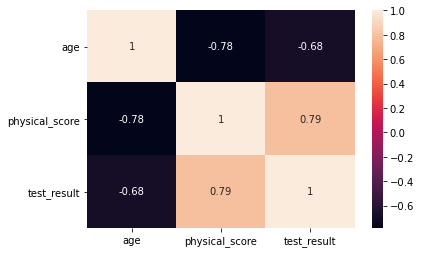

In [12]:
sns.heatmap(df.corr(),annot=True)

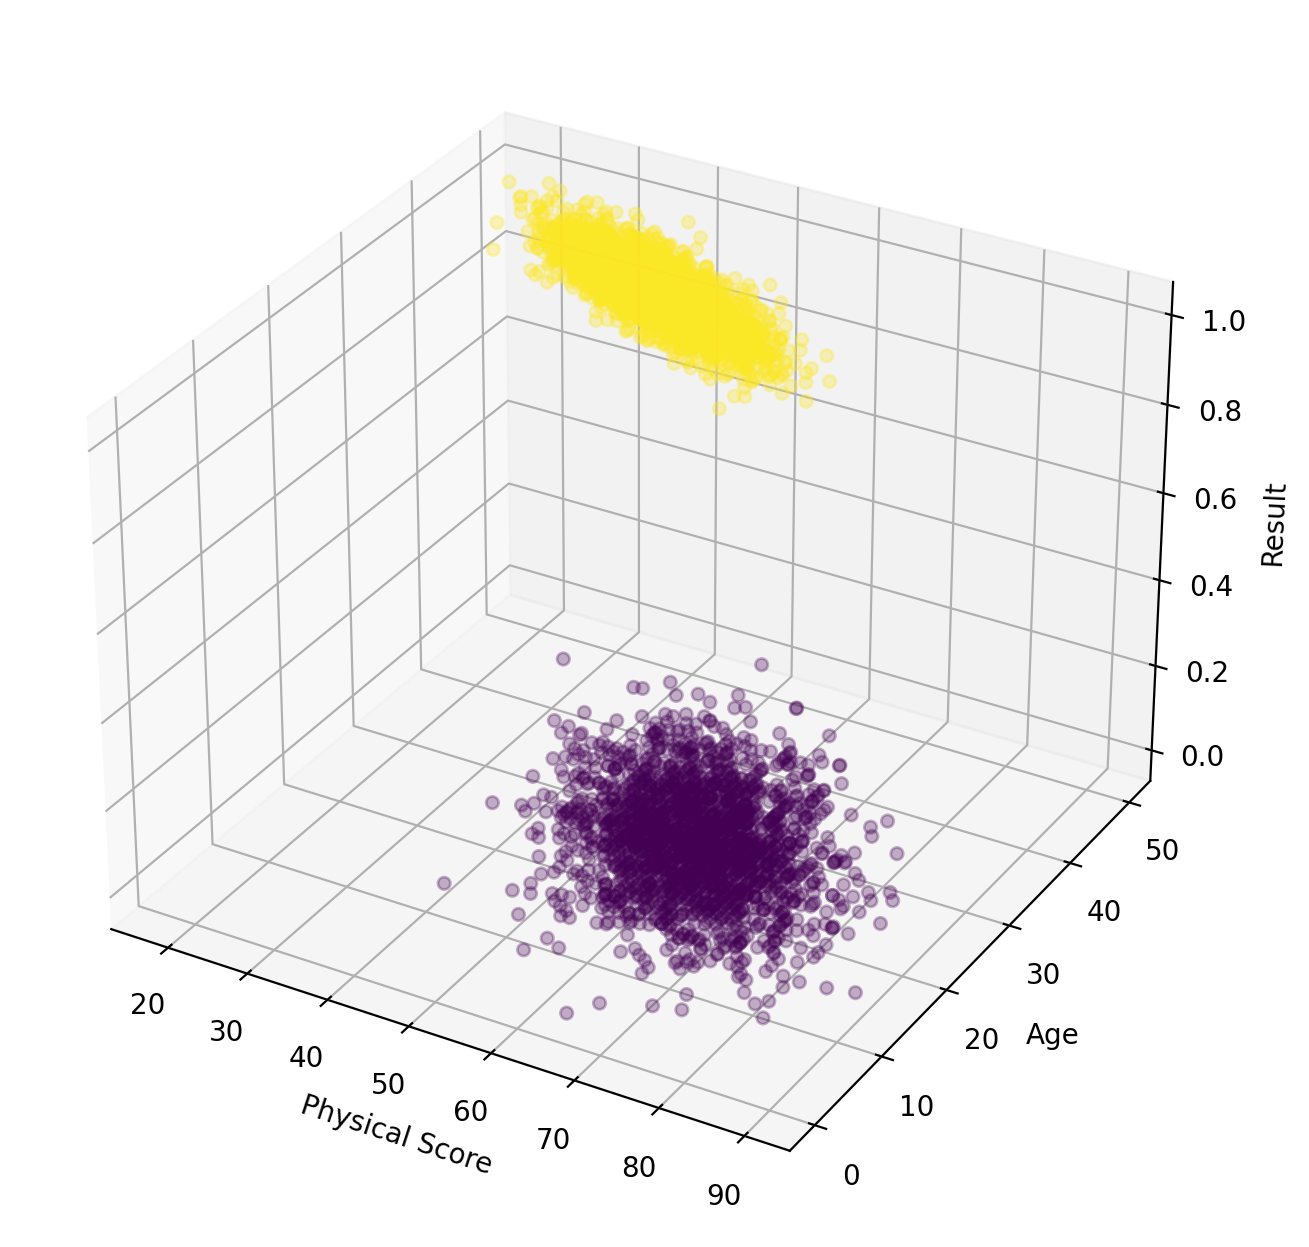

In [13]:
fig = plt.figure(figsize=(14,8),dpi=200)
ax = fig.add_subplot(projection='3d')
ax.scatter(df["age"], df["physical_score"], df["test_result"],c=df["test_result"], alpha=0.3)

ax.set_xlabel('Physical Score')
ax.set_ylabel('Age')
ax.set_zlabel('Result')

plt.show()

In [14]:
df.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


In [15]:
X = df.drop("test_result",axis=1)

In [16]:
y = df["test_result"]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
log_model = LogisticRegression()

In [21]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [22]:
y_pred = log_model.predict_proba(X_test)

In [23]:
log_model.coef_

array([[-0.94953524,  3.45991194]])

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score, f1_score, classification_report

In [27]:
y_pred = log_model.predict(X_test)

In [28]:
accuracy_score(y_test, y_pred)

0.93

In [29]:
confusion_matrix(y_test,y_pred)

array([[172,  21],
       [ 14, 293]], dtype=int64)

In [30]:
from sklearn.metrics import plot_confusion_matrix

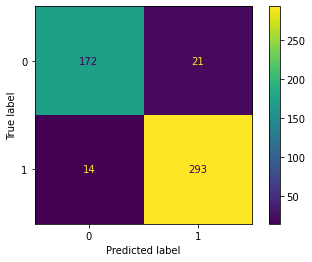

In [31]:
plot_confusion_matrix(log_model, X_test, y_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



In [34]:
from sklearn.metrics import precision_score, recall_score

In [35]:
precision_score(y_test,y_pred)

0.9331210191082803

In [36]:
recall_score(y_test,y_pred)

0.9543973941368078

In [38]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve

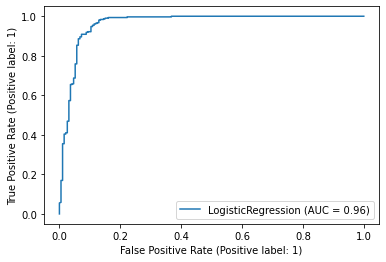

In [40]:
plot_roc_curve(log_model, X_test, y_test)

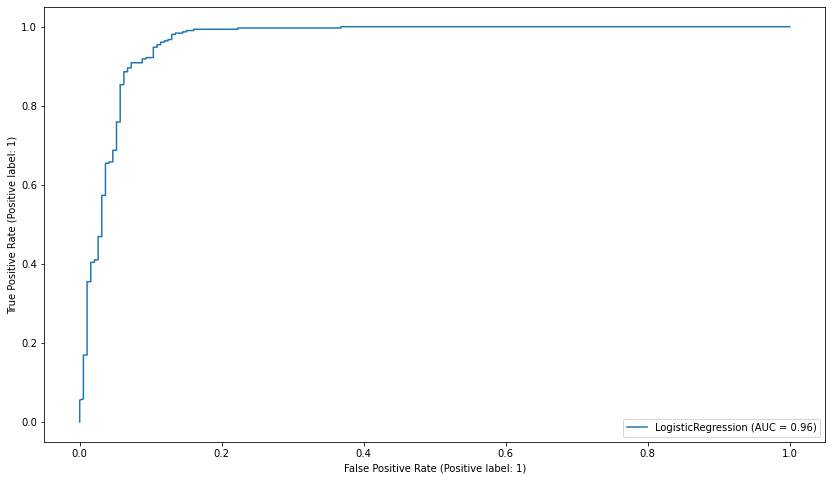

In [42]:
fig, ax = plt.subplots(figsize=(14,8))
plot_roc_curve(log_model, X_test, y_test, ax=ax)